<a href="https://colab.research.google.com/github/amittiwarix/Face-Mask-Detection-using-Convolutional-Neural-Network-CNN-/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/archive (17).zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

'archive (17).zip'   data   sample_data


In [6]:
##Importing the Dependencies

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [10]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3369.jpg', 'with_mask_2647.jpg', 'with_mask_2698.jpg', 'with_mask_2682.jpg', 'with_mask_2815.jpg']
['with_mask_2745.jpg', 'with_mask_2795.jpg', 'with_mask_3318.jpg', 'with_mask_3209.jpg', 'with_mask_3400.jpg']


In [12]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3755.jpg', 'without_mask_3782.jpg', 'without_mask_3377.jpg', 'without_mask_3494.jpg', 'without_mask_3694.jpg']
['without_mask_3115.jpg', 'without_mask_3248.jpg', 'without_mask_2830.jpg', 'without_mask_2945.jpg', 'without_mask_3807.jpg']


In [13]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 1271
Number of without mask images: 1028


In [14]:
##Creating Labels for the two class of Images

In [17]:
with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

2299
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [18]:
print(len(with_mask_labels))
print(len(without_mask_labels))

1271
1028


In [19]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

2299
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [20]:
##Displaying the Images

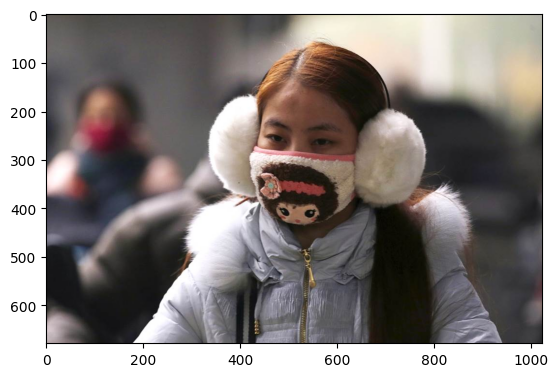

In [23]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/' + with_mask_files[0])
imgplot = plt.imshow(img)
plt.show()

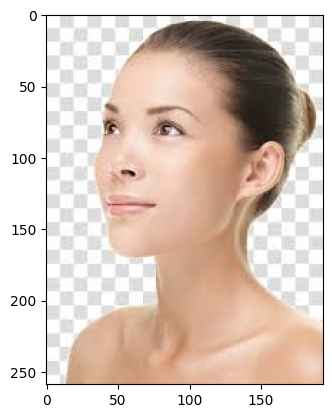

In [24]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [25]:
##Image Processing

In [26]:
##Resize the Images

##Convert the images to numpy arrays

In [27]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [28]:
type(data)

list

In [29]:
len(data)

2299

array([[[ 97,  92,  88],
        [ 95,  90,  86],
        [ 93,  88,  82],
        ...,
        [186, 187, 174],
        [183, 183, 173],
        [183, 183, 173]],

       [[ 97,  92,  88],
        [ 95,  90,  86],
        [ 94,  89,  85],
        ...,
        [184, 185, 171],
        [181, 181, 171],
        [181, 181, 171]],

       [[ 98,  93,  89],
        [ 96,  91,  87],
        [ 96,  91,  89],
        ...,
        [184, 185, 171],
        [182, 182, 172],
        [181, 181, 171]],

       ...,

       [[199, 187, 191],
        [192, 180, 184],
        [185, 173, 177],
        ...,
        [ 63,  63,  65],
        [ 59,  59,  61],
        [ 49,  49,  51]],

       [[196, 183, 187],
        [187, 174, 178],
        [176, 163, 167],
        ...,
        [ 63,  63,  65],
        [ 56,  56,  58],
        [ 46,  46,  48]],

       [[190, 175, 178],
        [182, 167, 170],
        [174, 158, 161],
        ...,
        [ 62,  62,  64],
        [ 53,  53,  55],
        [ 44,  44,  46]]], dtype=uint8)
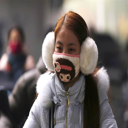

In [30]:
data[0]

In [32]:
type(data[0])

numpy.ndarray

In [33]:
data[0].shape

(128, 128, 3)

In [34]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [35]:
type(X)

numpy.ndarray

In [36]:
type(Y)

numpy.ndarray

In [38]:
print(X.shape)
print(Y.shape)

(2299, 128, 128, 3)
(2299,)


In [40]:
print(Y)

[1 1 1 ... 0 0 0]


In [41]:
##Train Test Split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(2299, 128, 128, 3) (1839, 128, 128, 3) (460, 128, 128, 3)


In [46]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[207, 207, 205],
        [207, 207, 205],
        [207, 207, 205],
        ...,
        [214, 215, 207],
        [214, 215, 207],
        [214, 215, 207]],

       [[207, 207, 205],
        [207, 207, 205],
        [207, 207, 205],
        ...,
        [214, 215, 207],
        [214, 215, 207],
        [214, 215, 207]],

       [[207, 207, 205],
        [207, 207, 205],
        [207, 207, 205],
        ...,
        [214, 215, 209],
        [214, 215, 209],
        [214, 215, 209]],

       ...,

       [[228, 229, 221],
        [223, 224, 216],
        [216, 217, 209],
        ...,
        [208, 209, 201],
        [206, 207, 199],
        [208, 209, 201]],

       [[226, 227, 221],
        [221, 222, 216],
        [216, 217, 210],
        ...,
        [206, 207, 198],
        [206, 207, 198],
        [210, 211, 202]],

       [[223, 224, 219],
        [219, 220, 215],
        [215, 216, 211],
        ...,
        [203, 205, 194],
        [205, 207, 196],
        [212, 213, 204]]], dtype=uint8)
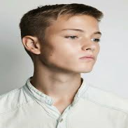

In [47]:
X_train[0]

In [48]:
X_train_scaled[0]

array([[[0.81176471, 0.81176471, 0.80392157],
        [0.81176471, 0.81176471, 0.80392157],
        [0.81176471, 0.81176471, 0.80392157],
        ...,
        [0.83921569, 0.84313725, 0.81176471],
        [0.83921569, 0.84313725, 0.81176471],
        [0.83921569, 0.84313725, 0.81176471]],

       [[0.81176471, 0.81176471, 0.80392157],
        [0.81176471, 0.81176471, 0.80392157],
        [0.81176471, 0.81176471, 0.80392157],
        ...,
        [0.83921569, 0.84313725, 0.81176471],
        [0.83921569, 0.84313725, 0.81176471],
        [0.83921569, 0.84313725, 0.81176471]],

       [[0.81176471, 0.81176471, 0.80392157],
        [0.81176471, 0.81176471, 0.80392157],
        [0.81176471, 0.81176471, 0.80392157],
        ...,
        [0.83921569, 0.84313725, 0.81960784],
        [0.83921569, 0.84313725, 0.81960784],
        [0.83921569, 0.84313725, 0.81960784]],

       ...,

       [[0.89411765, 0.89803922, 0.86666667],
        [0.8745098 , 0.87843137, 0.84705882],
        [0.84705882, 0

In [49]:
##Building a Convolutional Neural Networks (CNN)

In [50]:
import tensorflow as tf
from tensorflow import keras

In [52]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [54]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [55]:
##Model Evaluation

In [56]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - acc: 0.5540 - loss: 0.6901
Test Accuracy = 0.573913037776947


Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - acc: 0.5637 - loss: 0.8633 - val_acc: 0.8587 - val_loss: 0.4085
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.8245 - loss: 0.4168 - val_acc: 0.8696 - val_loss: 0.3257
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.8480 - loss: 0.3262 - val_acc: 0.8913 - val_loss: 0.2693
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.8817 - loss: 0.3098 - val_acc: 0.9103 - val_loss: 0.2368
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9093 - loss: 0.2228 - val_acc: 0.9022 - val_loss: 0.3086


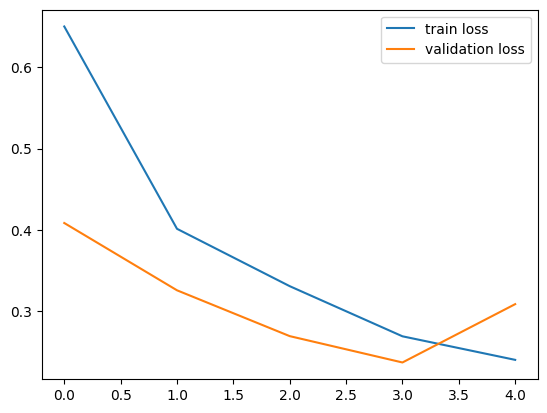

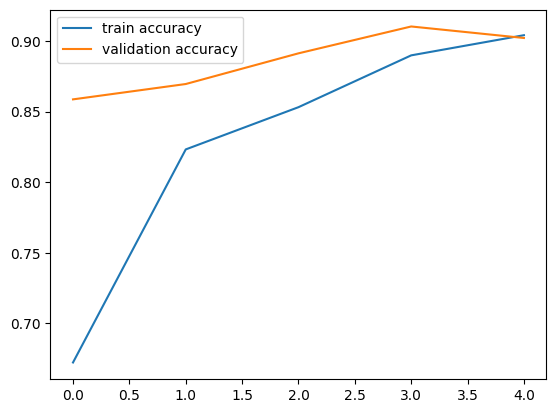

In [58]:
h = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=5, verbose=1)

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [59]:
##Predictive System

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')